# Managing missing data

## Workflow
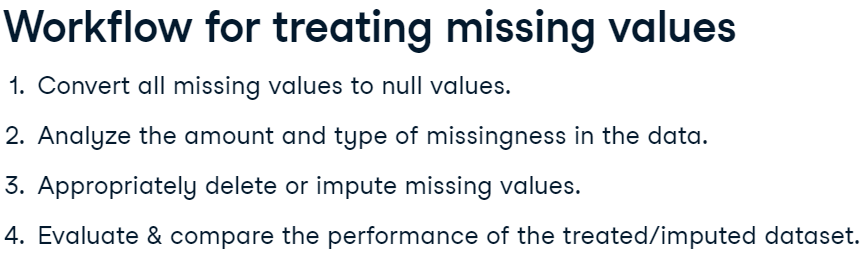

### Definicion de librerias

In [1]:
import os
# establish the working directory
os.chdir(r'c:\Users\Andres Ruiz Rada\Documents\GitHub\poc-069-lumon-riesgo-crediticio-fase1')
print(os.getcwd())

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import statsmodels.api as sm



c:\Users\Andres Ruiz Rada\Documents\GitHub\poc-069-lumon-riesgo-crediticio-fase1


In [2]:
# Imputacion y evaluacion
from sklearn.linear_model import LinearRegression

# To use the experimental IterativeImputer, we need to explicitly ask for it:
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer, KNNImputer, SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

In [4]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from numpy import uint8

### Leer, borrar missing values y diagnosticar dataset, antes de la codificacion de los datos categoricos

In [5]:
file_path = 'data\stage\db_pross_info_users.csv'
df = pd.read_csv(file_path).copy()
print(df.shape)
print(df.info())
df.head()

(4105, 39)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4105 entries, 0 to 4104
Data columns (total 39 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   PLAZO                                     4105 non-null   int64  
 1   CAPITAL                                   4105 non-null   int64  
 2   INT CORRIENTE                             4105 non-null   float64
 3   DÍAS MORA                                 4105 non-null   int64  
 4   Cuotas en mora                            4105 non-null   int64  
 5   ESTRATO                                   4097 non-null   float64
 6   INGRESOS MENSUALES                        3416 non-null   float64
 7   GASTOS MENSUALES                          3396 non-null   float64
 8   INGRESOS ADICIONALES                      2328 non-null   float64
 9   PERSONAS A CARGO                          2741 non-null   float64
 10  NUMERO DE HIJOS          

,PLAZO,CAPITAL,INT CORRIENTE,DÍAS MORA,Cuotas en mora,ESTRATO,INGRESOS MENSUALES,GASTOS MENSUALES,INGRESOS ADICIONALES,PERSONAS A CARGO,...,ESTADO CIVIL_viudo/a,NIVEL EDUCATIVO_postgrado,NIVEL EDUCATIVO_primaria,NIVEL EDUCATIVO_profesional,NIVEL EDUCATIVO_secundaria,NIVEL EDUCATIVO_tecnico,NIVEL EDUCATIVO_tecnologo,TIPO DE VEHICULO_moto,TIPO DE VEHICULO_ninguno,mes_de_pago
0,9,100000,563.100000,2869,1,2.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,6
1,14,150000,1313.900000,2864,1,3.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,7
2,30,350000,6569.500000,2856,1,3.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,7
3,29,250000,4536.083333,2851,1,3.0,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,7
4,28,200000,3503.733333,2851,1,3.0,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,7


In [5]:
# cantinad de datos nulos
df.isnull().mean()*100

PLAZO                                        0.000000
CAPITAL                                      0.000000
INT CORRIENTE                                0.000000
DÍAS MORA                                    0.000000
Cuotas en mora                               0.000000
ESTRATO                                      0.194884
INGRESOS MENSUALES                          16.784409
GASTOS MENSUALES                            17.271620
INGRESOS ADICIONALES                        43.288672
PERSONAS A CARGO                            33.227771
NUMERO DE HIJOS                             33.349574
NUM.CREDITOS SOLICITADOS                     0.000000
AÑOS EN LA VIVIENDA                          0.170524
latitud                                      3.361754
longitud                                     3.361754
meses_transcurridos                         23.775883
TIPO EMPLEO_empleado                         0.000000
TIPO EMPLEO_independiente                    0.000000
TIPO EMPLEO_pensionado      

### Graficas caracterizacion imputacion

<Axes: >

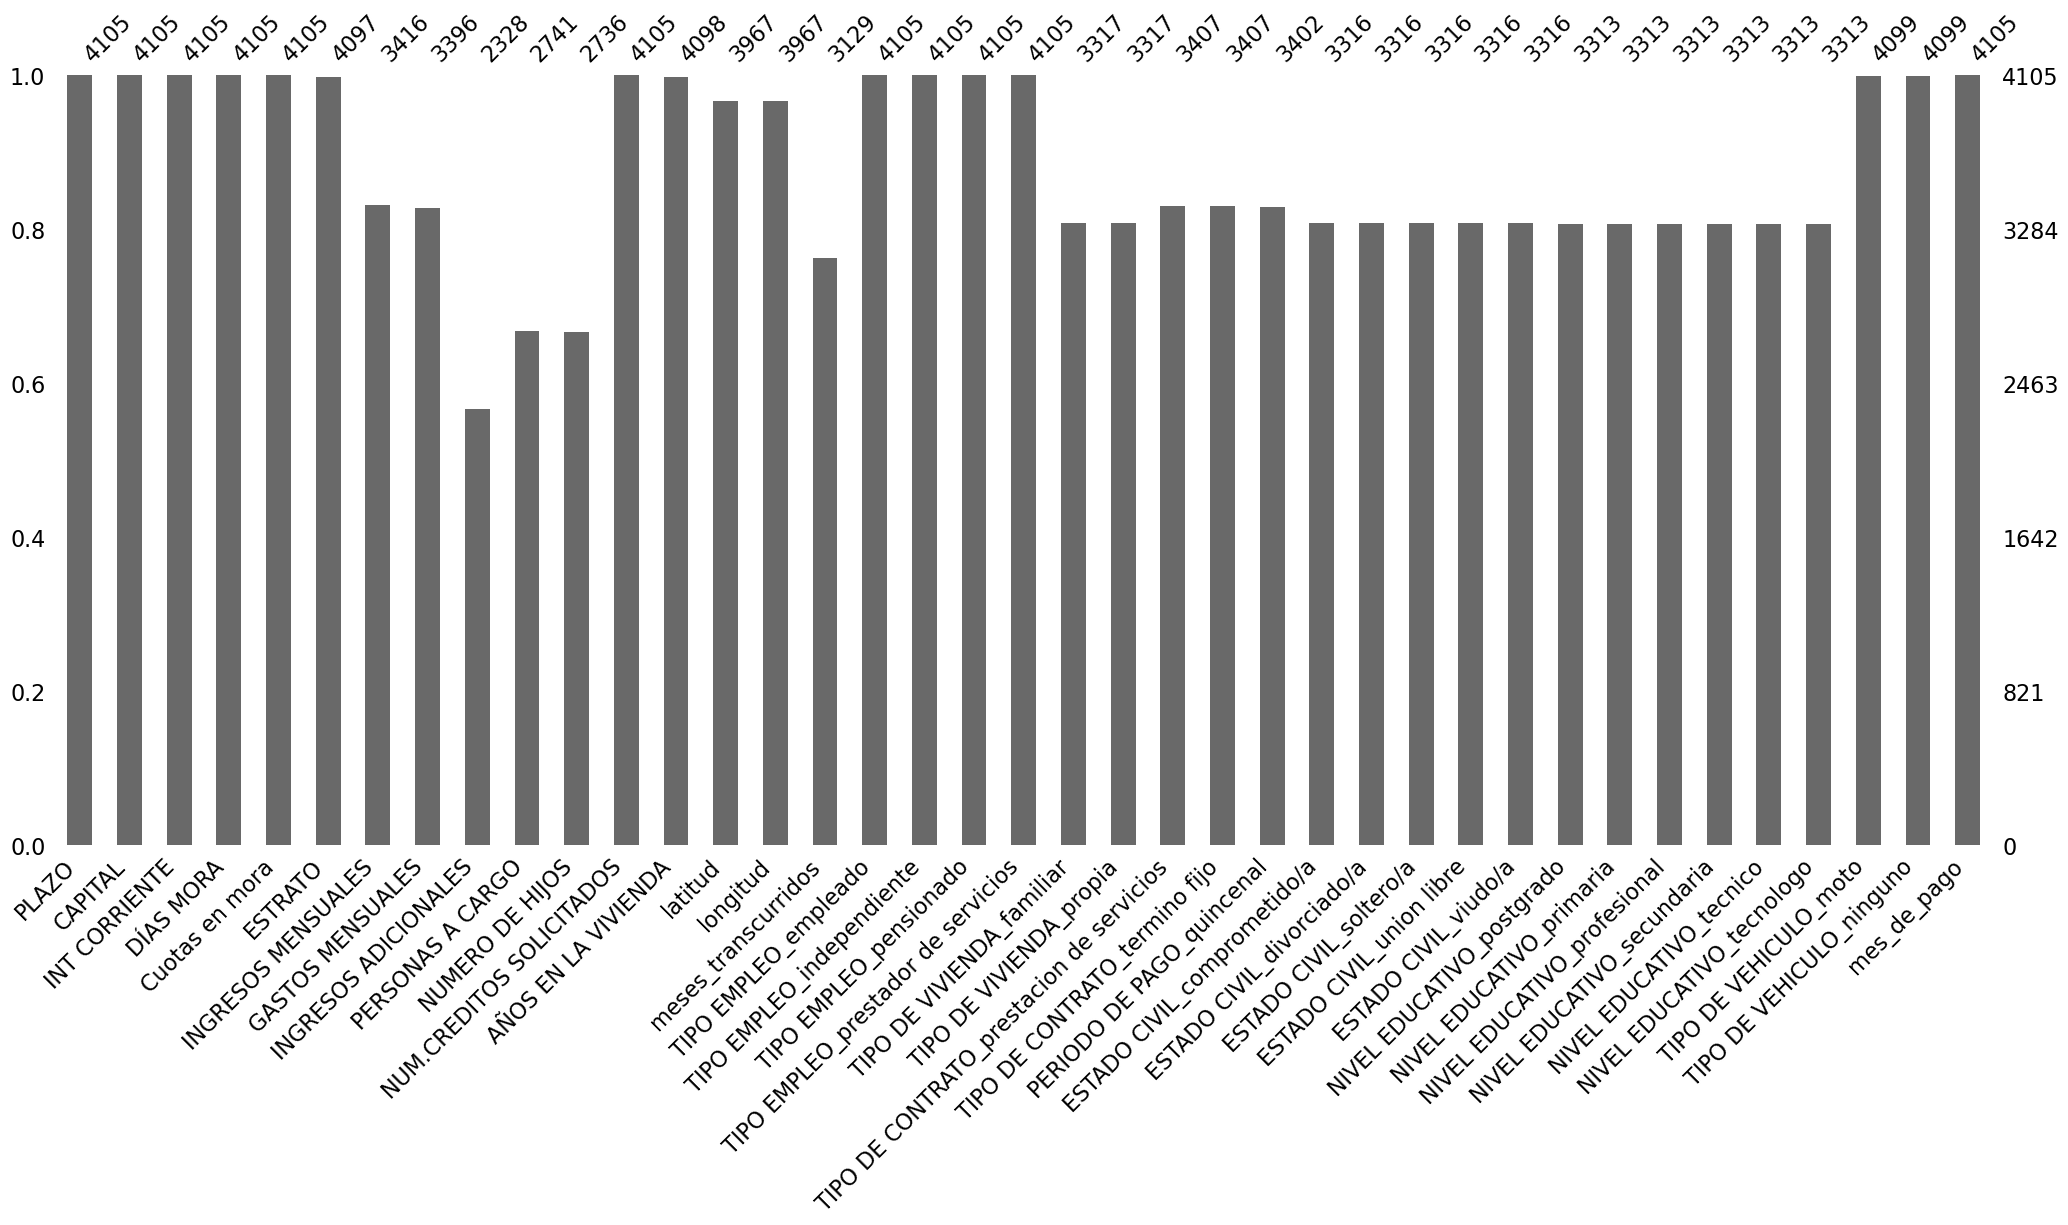

In [6]:
msno.bar(df)

<Axes: >

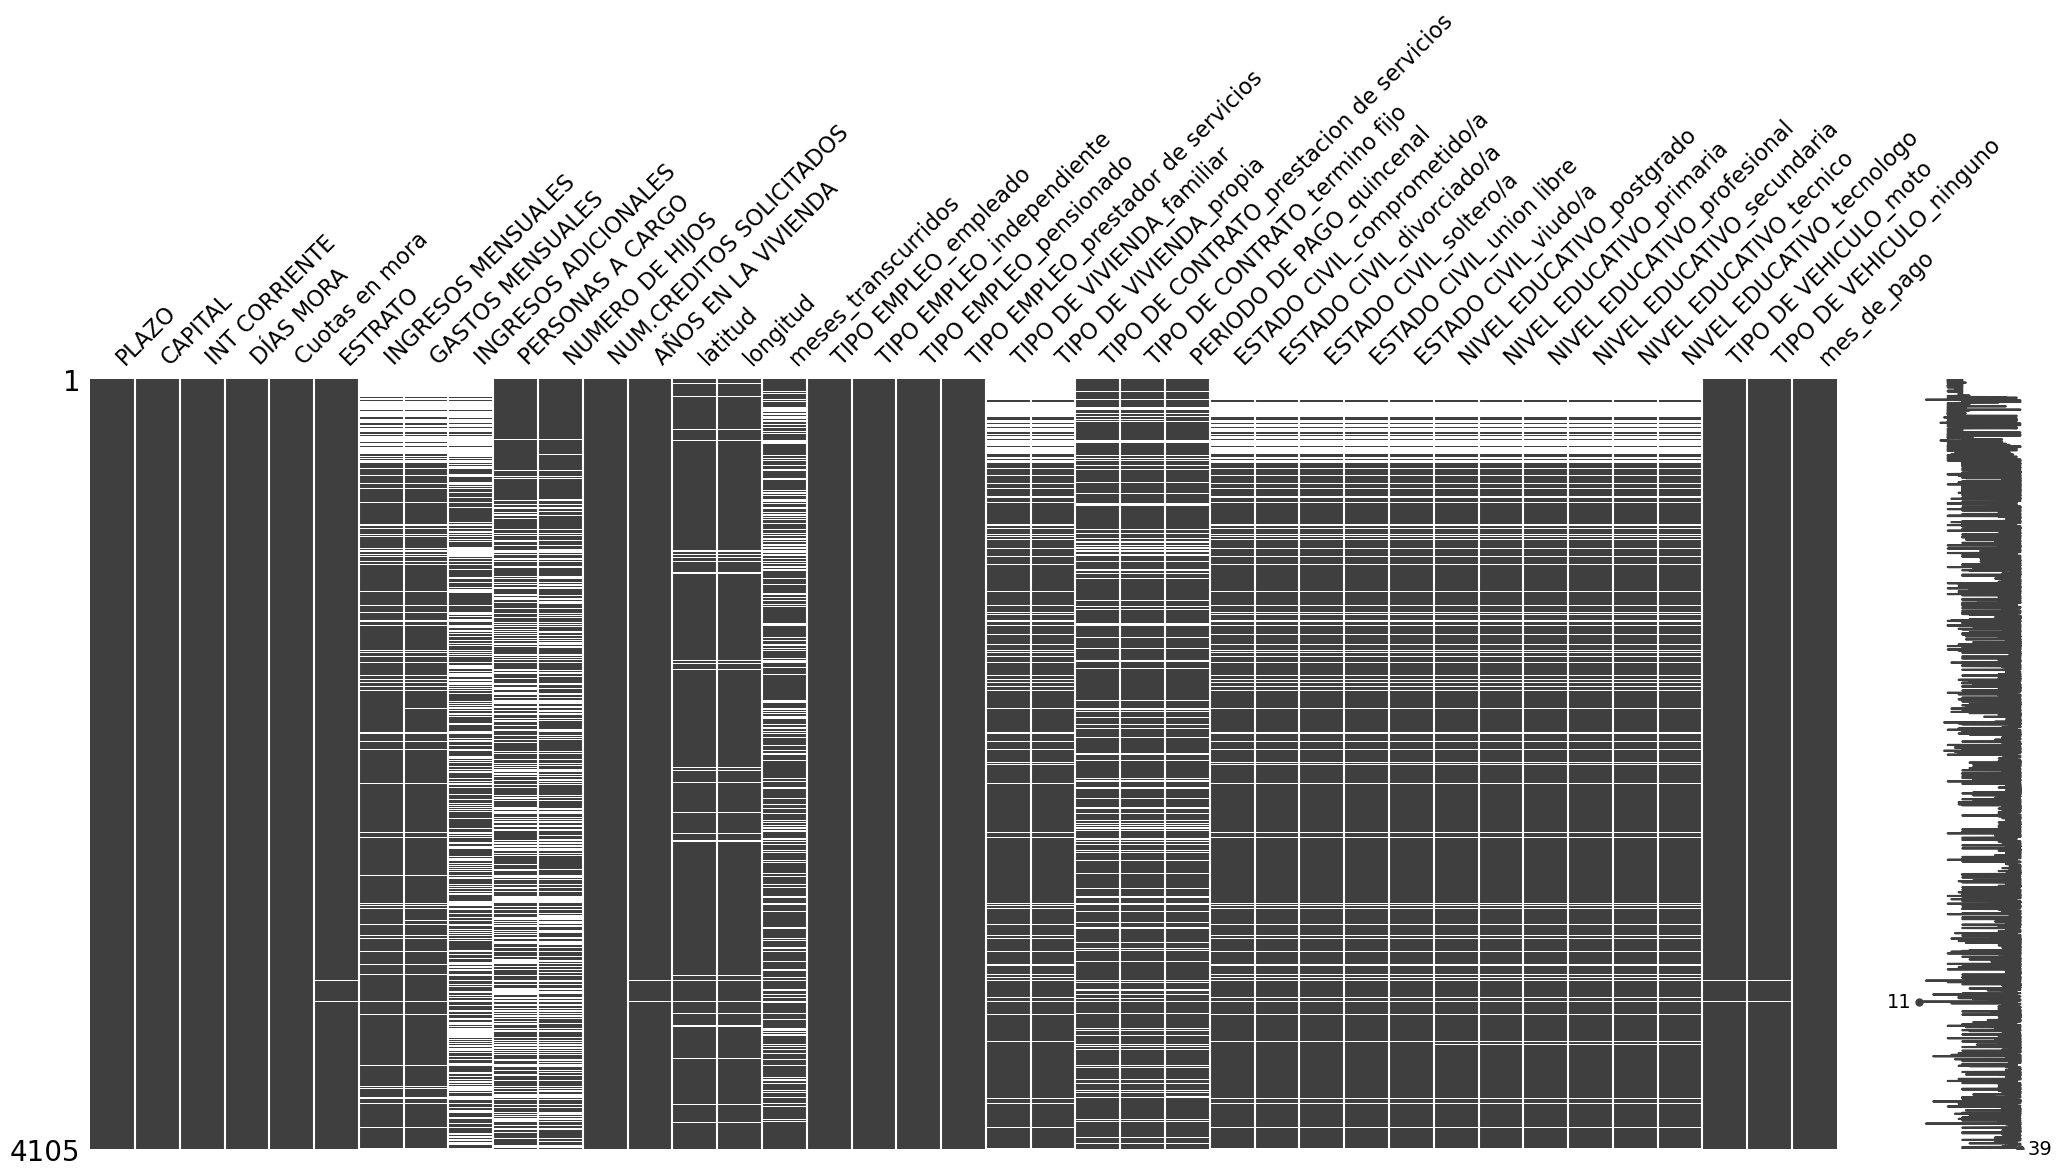

In [7]:
msno.matrix(df)

c:\Users\Andres Ruiz Rada\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


ValueError: could not convert string to float: '--'

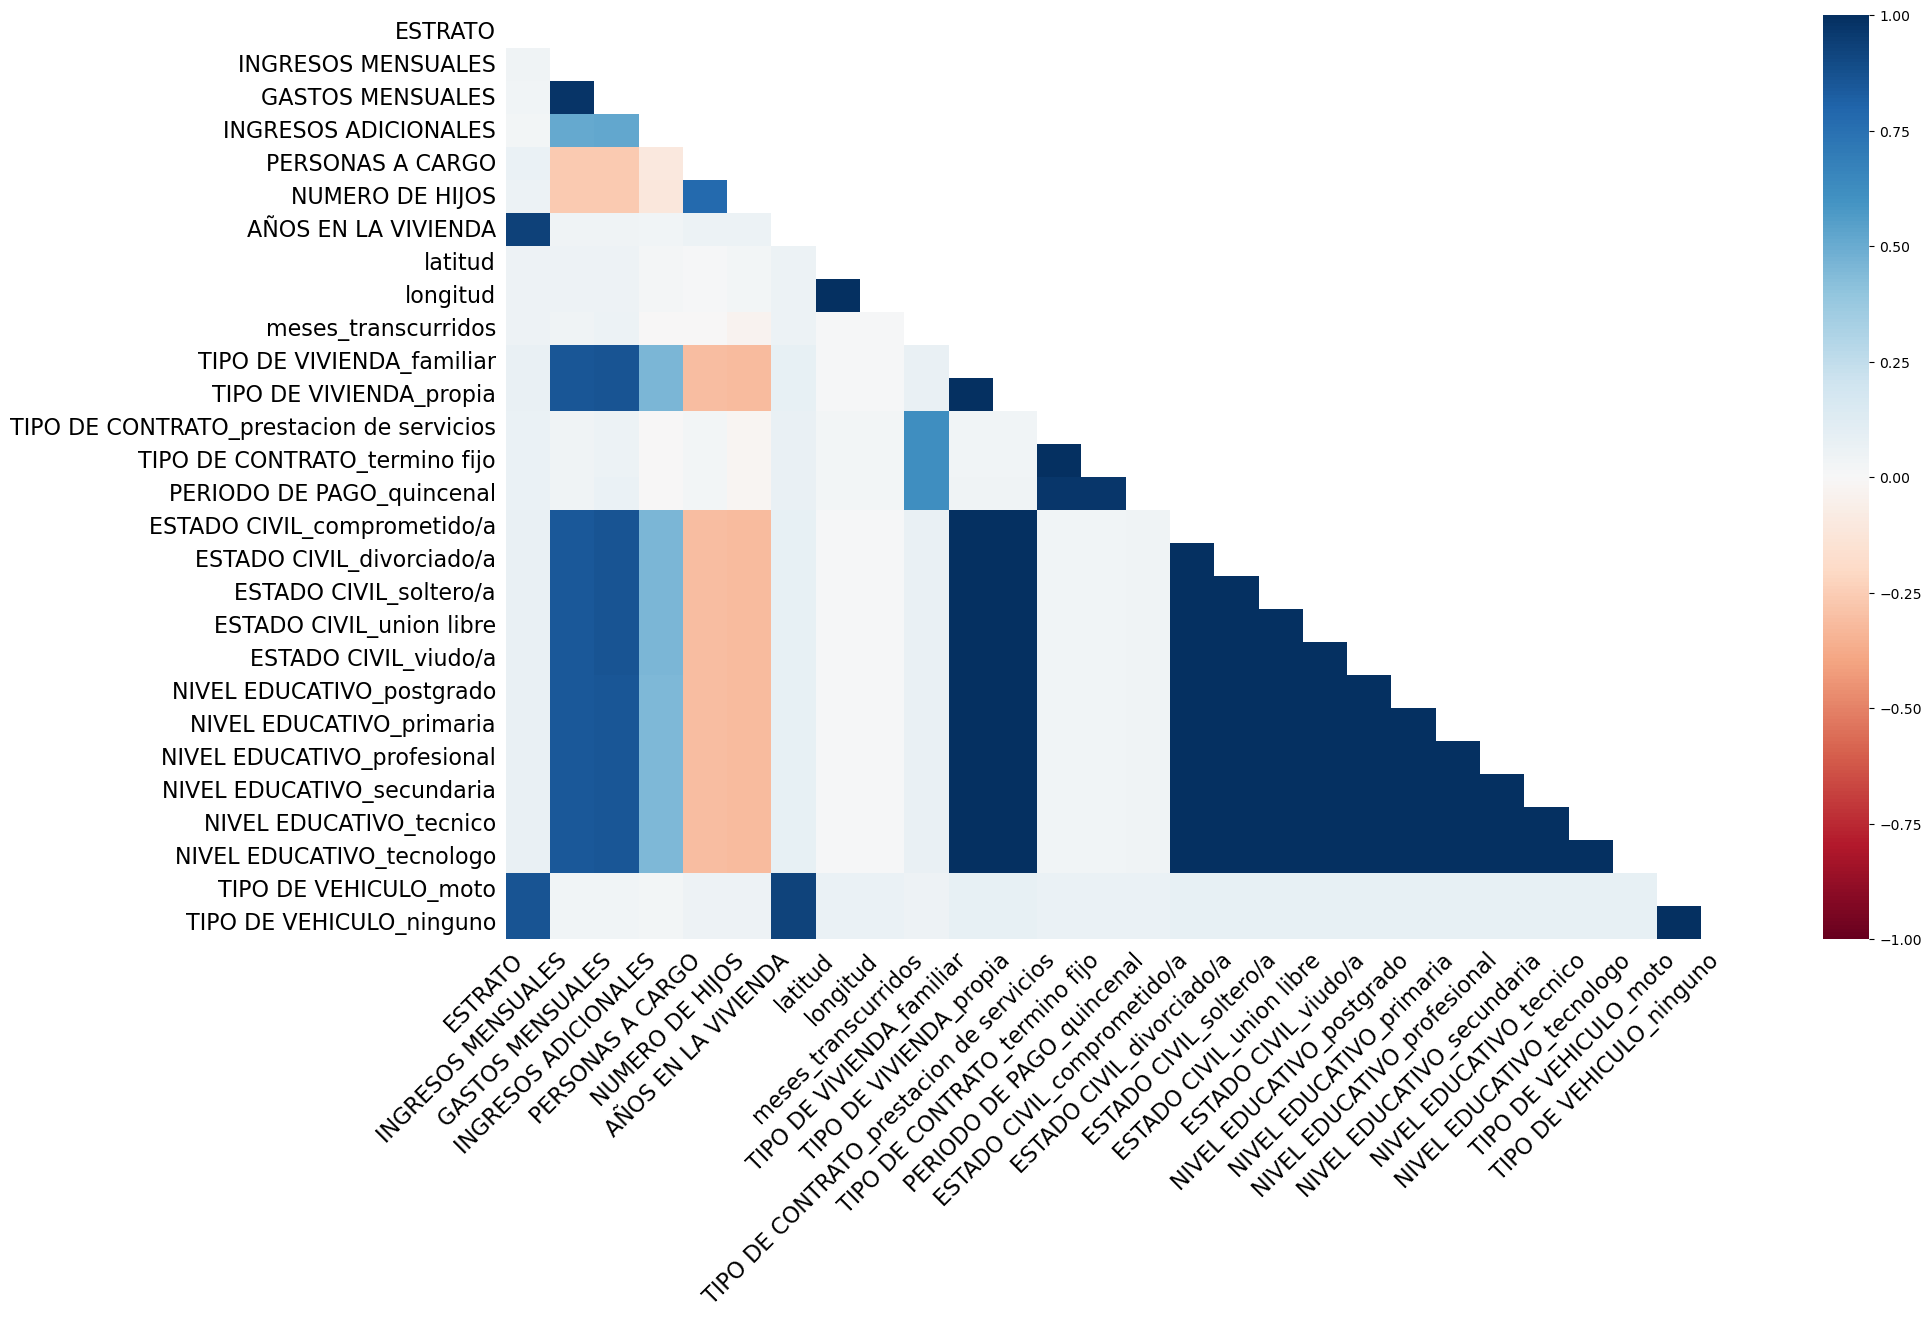

In [8]:
msno.heatmap(df)

<Axes: >

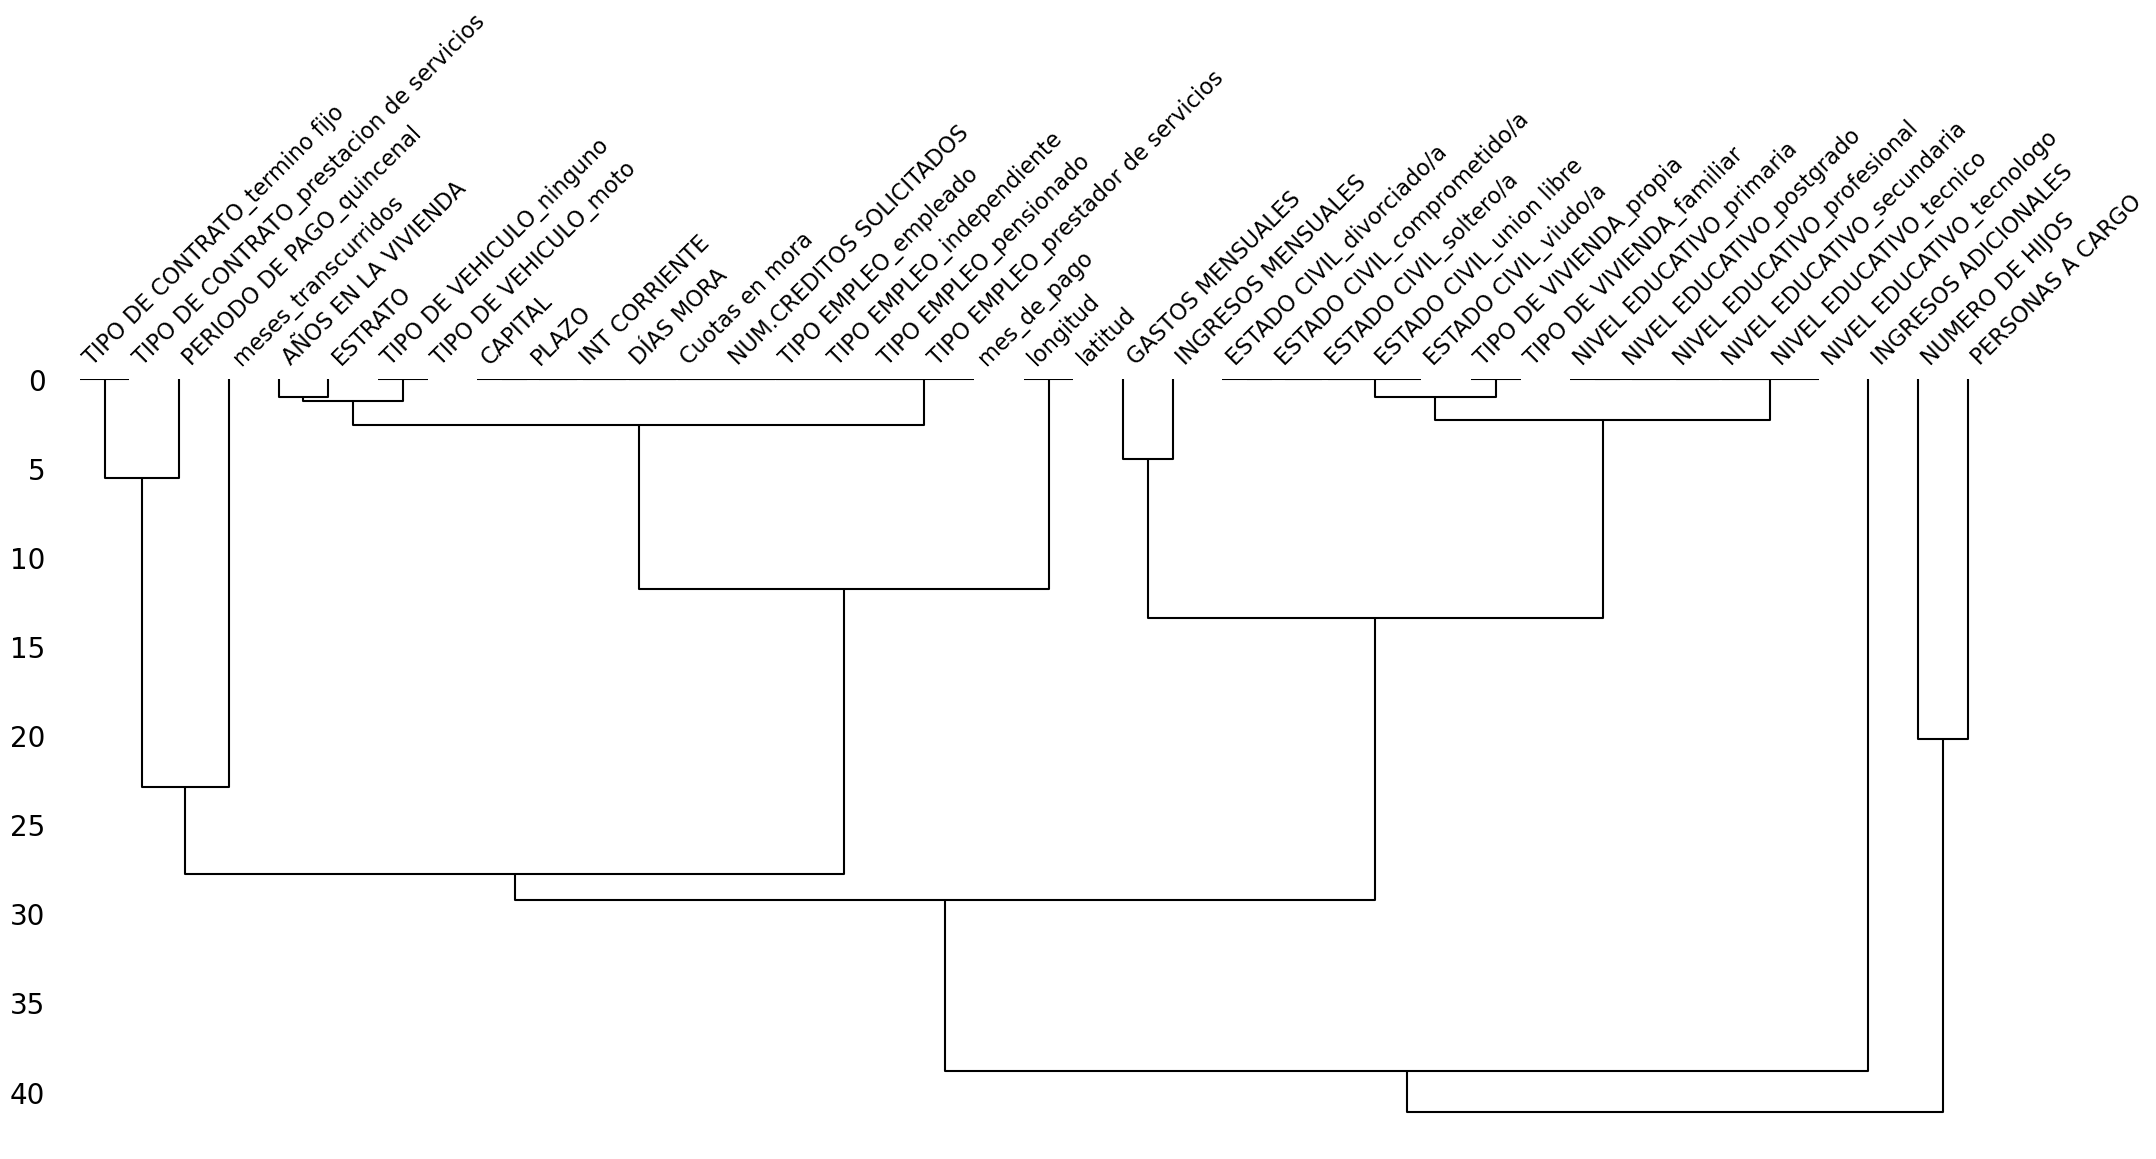

In [9]:
msno.dendrogram(df)

## Distribucion inicial del dataset



In [91]:
# Eliminacion de registros con datos faltantes

df_cc = df.dropna(how='any')
print(df.shape)
print(df_cc.shape)


(4105, 39)
(862, 39)


In [92]:
# definicion target y features
y_incompleto = df['Cuotas en mora']
X_incompleto = df.drop(['Cuotas en mora'], axis=1)

# Datos sin valores faltantes
y_cc = df_cc['Cuotas en mora']
X_cc = df_cc.drop(['Cuotas en mora'], axis=1)

# inicializacion de stacks para comparacion de las imputaciones
x_labels = []
mses_df = np.zeros(4)
stds_df = np.zeros(4)

In [70]:
#codigo temporal para agregar metodos de imputacion
mses_df = np.zeros(4)
stds_df = np.zeros(4)
x_labels = []

In [93]:
#Caso base usando regresion lineal
regressor = LinearRegression(fit_intercept = True, n_jobs = -1)
N_SPLITS = 5

#caracterizacion del dataset sin datos faltantes
def caracterizar_datos_inicial(X, y):
    full_scores = cross_val_score(
        regressor, X, y, scoring="neg_mean_squared_error", cv=N_SPLITS
    )
    return full_scores.mean(), full_scores.std()


mses_df[0], stds_df[0] = caracterizar_datos_inicial(X_cc, y_cc)
x_labels.append("Datos iniciales")

## Imputaciones

In [141]:
binary_columns = X_incompleto.columns[(X_incompleto.nunique() == 2)]
binary_columns 

X_num = X_incompleto.drop(columns = binary_columns)

X_incompleto = pd.concat([X_num, X_categorico], axis = 1)


In [143]:
X_categorico = X_incompleto[binary_columns]

In [6]:
columns_with_missing_values = df.columns[df.isnull().any()]
columns_with_missing_values


Index(['ESTRATO', 'INGRESOS MENSUALES', 'GASTOS MENSUALES',
       'INGRESOS ADICIONALES', 'PERSONAS A CARGO', 'NUMERO DE HIJOS',
       'AÑOS EN LA VIVIENDA', 'latitud', 'longitud', 'meses_transcurridos',
       'TIPO DE VIVIENDA_familiar', 'TIPO DE VIVIENDA_propia',
       'TIPO DE CONTRATO_prestacion de servicios',
       'TIPO DE CONTRATO_termino fijo', 'PERIODO DE PAGO_quincenal',
       'ESTADO CIVIL_comprometido/a', 'ESTADO CIVIL_divorciado/a',
       'ESTADO CIVIL_soltero/a', 'ESTADO CIVIL_union libre',
       'ESTADO CIVIL_viudo/a', 'NIVEL EDUCATIVO_postgrado',
       'NIVEL EDUCATIVO_primaria', 'NIVEL EDUCATIVO_profesional',
       'NIVEL EDUCATIVO_secundaria', 'NIVEL EDUCATIVO_tecnico',
       'NIVEL EDUCATIVO_tecnologo', 'TIPO DE VEHICULO_moto',
       'TIPO DE VEHICULO_ninguno'],
      dtype='object')

### Imputaciones numericas univariable
Desde estrato hasta meses transcurridos

In [7]:
#Columnas a imputar
columnas_a_imputar = ['ESTRATO', 'PERSONAS A CARGO', 'NUMERO DE HIJOS', 'AÑOS EN LA VIVIENDA', 'latitud', 'longitud', 'meses_transcurridos']

imputer = SimpleImputer(strategy='most_frequent')

#imputa las columnas
df[columnas_a_imputar] = imputer.fit_transform(df[columnas_a_imputar])

#confirma valores nulos en columnas imputadas
print("Valores nulos en columnas imputadas:")
print(df[columnas_a_imputar].isnull().sum())

#valor imputado
print("Valor imputado:")
print(imputer.statistics_)

#guarda el dataframe imputado
file_path = 'data\stage\df_numerico_imputado.csv'
df.to_csv(file_path, index=False)



Valores nulos en columnas imputadas:
ESTRATO                0
PERSONAS A CARGO       0
NUMERO DE HIJOS        0
AÑOS EN LA VIVIENDA    0
latitud                0
longitud               0
meses_transcurridos    0
dtype: int64
Valor imputado:
[  3.        1.        1.        3.        4.60971 -74.08175  12.     ]


Imputacion numerica variables continuas 'INGRESOS MENSUALES', 'GASTOS MENSUALES','INGRESOS ADICIONALES'

In [8]:
columnas_a_imputar1 = ['INGRESOS MENSUALES', 'GASTOS MENSUALES','INGRESOS ADICIONALES']

imputer = SimpleImputer(strategy='median')

#imputa las columnas
df[columnas_a_imputar1] = imputer.fit_transform(df[columnas_a_imputar1])

#confirma valores nulos en columnas imputadas
print("Valores nulos en columnas imputadas:")
print(df[columnas_a_imputar1].isnull().sum())

#valor imputado
print("Valor imputado:")
print(imputer.statistics_)

#guarda el dataframe imputado
file_path = 'data\stage\df_numerico1_imputado.csv'
df.to_csv(file_path, index=False)

Valores nulos en columnas imputadas:
INGRESOS MENSUALES      0
GASTOS MENSUALES        0
INGRESOS ADICIONALES    0
dtype: int64
Valor imputado:
[1600000.  600000.  300000.]


<Axes: >

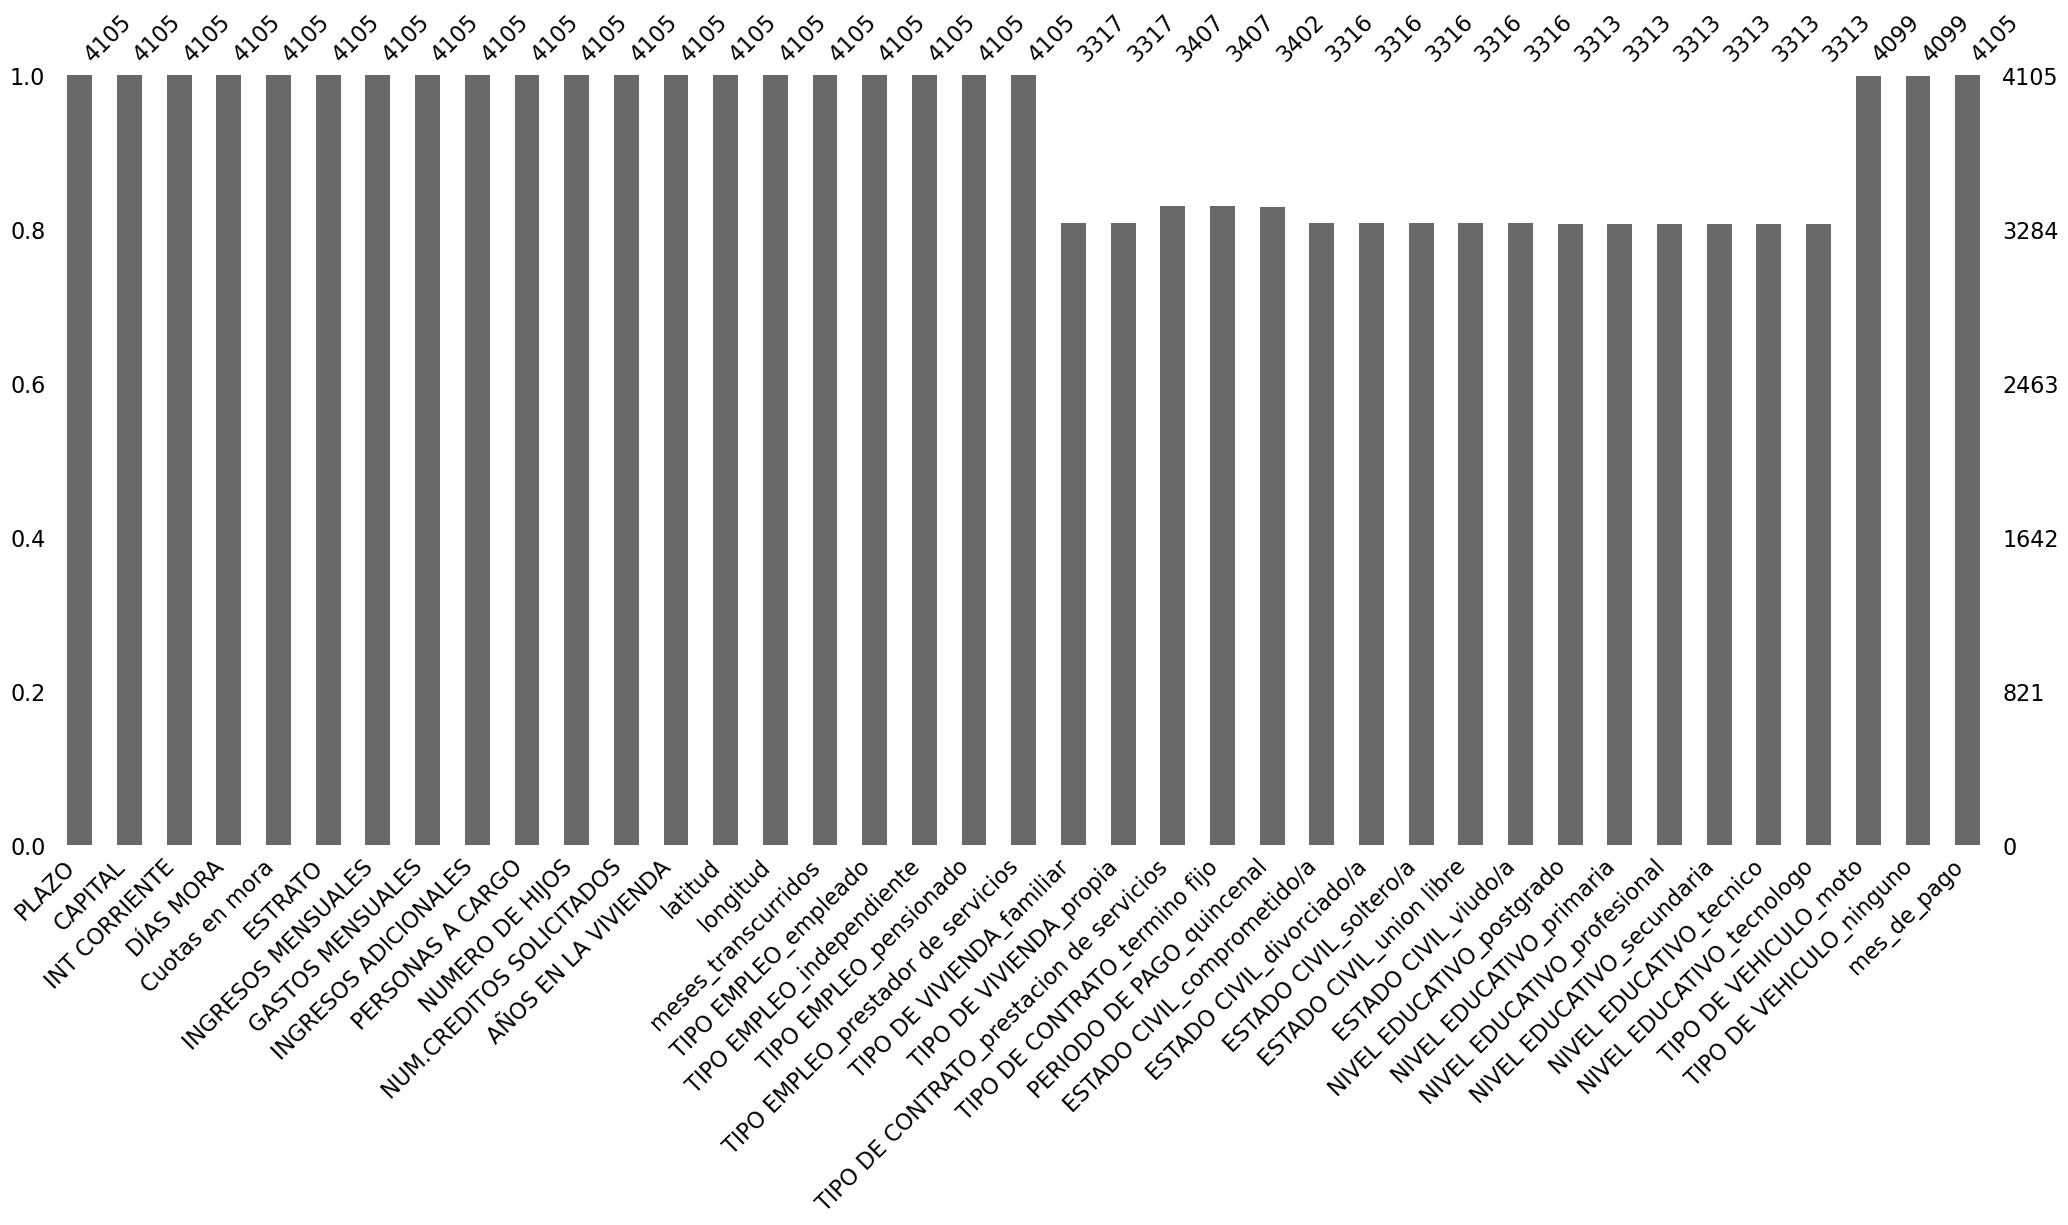

In [164]:
msno.bar(df)

### Imputacion variables categoricas

In [9]:
path_file = 'data\stage\db_stage_infousers.csv'
df_categorico = pd.read_csv(path_file)



In [19]:
#estandarizacion columna tipo de vivienda
df_categorico['TIPO DE VIVIENDA'] = df_categorico['TIPO DE VIVIENDA'].str.lower()
print(df_categorico['TIPO DE VIVIENDA'].unique())

['familiar' 'arrendada' 'propia']


In [25]:
columnas_a_imputar2 = ['TIPO DE VIVIENDA', 'TIPO DE CONTRATO', 'PERIODO DE PAGO',
       'ESTADO CIVIL', 'NIVEL EDUCATIVO', 'TIPO DE VEHICULO']

#estandarizacion columna tipo de vivienda
df_categorico['TIPO DE VIVIENDA'] = df_categorico['TIPO DE VIVIENDA'].str.lower()

imputer2 = SimpleImputer(strategy='most_frequent')

#imputa las columnas
df_categorico[columnas_a_imputar2] = imputer2.fit_transform(df_categorico[columnas_a_imputar2])

#confirma valores nulos en columnas imputadas
print("Valores nulos en columnas imputadas:")
print(df_categorico[columnas_a_imputar2].isnull().sum())

#valor imputado
print("Valor imputado:")
print(imputer2.statistics_)

#guarda el dataframe imputado
file_path = 'data\stage\df_categorico_imputado.csv'
df_categorico.to_csv(file_path, index=False)

Valores nulos en columnas imputadas:
TIPO DE VIVIENDA    0
TIPO DE CONTRATO    0
PERIODO DE PAGO     0
ESTADO CIVIL        0
NIVEL EDUCATIVO     0
TIPO DE VEHICULO    0
dtype: int64
Valor imputado:
['familiar' 'Indefinido' 'Quincenal' 'Soltero/a' 'Profesional' 'Ninguno']


### Codificacion variables categoricas

In [70]:
df2_encode = df_categorico[columnas_a_imputar2]
df2_encode.head()


,TIPO DE VIVIENDA,TIPO DE CONTRATO,PERIODO DE PAGO,ESTADO CIVIL,NIVEL EDUCATIVO,TIPO DE VEHICULO
0,familiar,Indefinido,Mensual,Soltero/a,Profesional,Ninguno
1,familiar,Indefinido,Mensual,Soltero/a,Profesional,Ninguno
2,familiar,Termino fijo,Mensual,Soltero/a,Profesional,Carro
3,familiar,Indefinido,Quincenal,Soltero/a,Profesional,Ninguno
4,familiar,Termino fijo,Mensual,Soltero/a,Profesional,Ninguno


In [71]:
df_encoded = pd.get_dummies(df2_encode,
                            drop_first=True,
                            dtype=uint8)


In [72]:
df_encoded.head()
df_encoded.isnull().sum()

TIPO DE VIVIENDA_familiar                   0
TIPO DE VIVIENDA_propia                     0
TIPO DE CONTRATO_Prestación de servicios    0
TIPO DE CONTRATO_Termino fijo               0
PERIODO DE PAGO_Quincenal                   0
ESTADO CIVIL_Comprometido/a                 0
ESTADO CIVIL_Divorciado/a                   0
ESTADO CIVIL_Soltero/a                      0
ESTADO CIVIL_Unión Libre                    0
ESTADO CIVIL_Viudo/a                        0
NIVEL EDUCATIVO_Postgrado                   0
NIVEL EDUCATIVO_Primaria                    0
NIVEL EDUCATIVO_Profesional                 0
NIVEL EDUCATIVO_Secundaria                  0
NIVEL EDUCATIVO_Tecnólogo                   0
NIVEL EDUCATIVO_Técnico                     0
TIPO DE VEHICULO_Moto                       0
TIPO DE VEHICULO_Ninguno                    0
dtype: int64

## Generacion de dataset final imputado

Para unir las columnas imputadas se hace una copia del dataset procesado y se sobreescriben las columnas imputadas 

In [39]:
columnas_numericas_imputadas = columnas_a_imputar + columnas_a_imputar1
columnas_numericas_imputadas


['ESTRATO',
 'PERSONAS A CARGO',
 'NUMERO DE HIJOS',
 'AÑOS EN LA VIVIENDA',
 'latitud',
 'longitud',
 'meses_transcurridos',
 'INGRESOS MENSUALES',
 'GASTOS MENSUALES',
 'INGRESOS ADICIONALES']

In [ ]:
#para unir las columnas imputadas se hace una copia del dataset procesado, se sobreescriben las columnas imputadas 

df_imputado_final = df.copy()

#columnas numericas imputadas
columnas_numericas_imputadas = columnas_a_imputar + columnas_a_imputar1

df_imputado_final[columnas_numericas_imputadas] = df[columnas_numericas_imputadas]

#columnas categoricas imputadas
df_imputado_final[columnas_a_imputar2] = df_categorico[columnas_a_imputar2]


df_imputado_final.head()

In [90]:
df_imputado_final=df_imputado_final.drop(columns = ['TIPO DE VIVIENDA_familiar', 'TIPO DE VIVIENDA_propia',
       'TIPO DE CONTRATO_prestacion de servicios',
       'TIPO DE CONTRATO_termino fijo', 'PERIODO DE PAGO_quincenal',
       'ESTADO CIVIL_comprometido/a', 'ESTADO CIVIL_divorciado/a',
       'ESTADO CIVIL_soltero/a', 'ESTADO CIVIL_union libre',
       'ESTADO CIVIL_viudo/a', 'NIVEL EDUCATIVO_postgrado',
       'NIVEL EDUCATIVO_primaria', 'NIVEL EDUCATIVO_profesional',
       'NIVEL EDUCATIVO_secundaria', 'NIVEL EDUCATIVO_tecnico',
       'NIVEL EDUCATIVO_tecnologo', 'TIPO DE VEHICULO_moto',
       'TIPO DE VEHICULO_ninguno'])


In [91]:
df_imputado_final= pd.concat([df_imputado_final, df_encoded], axis=1)

<Axes: >

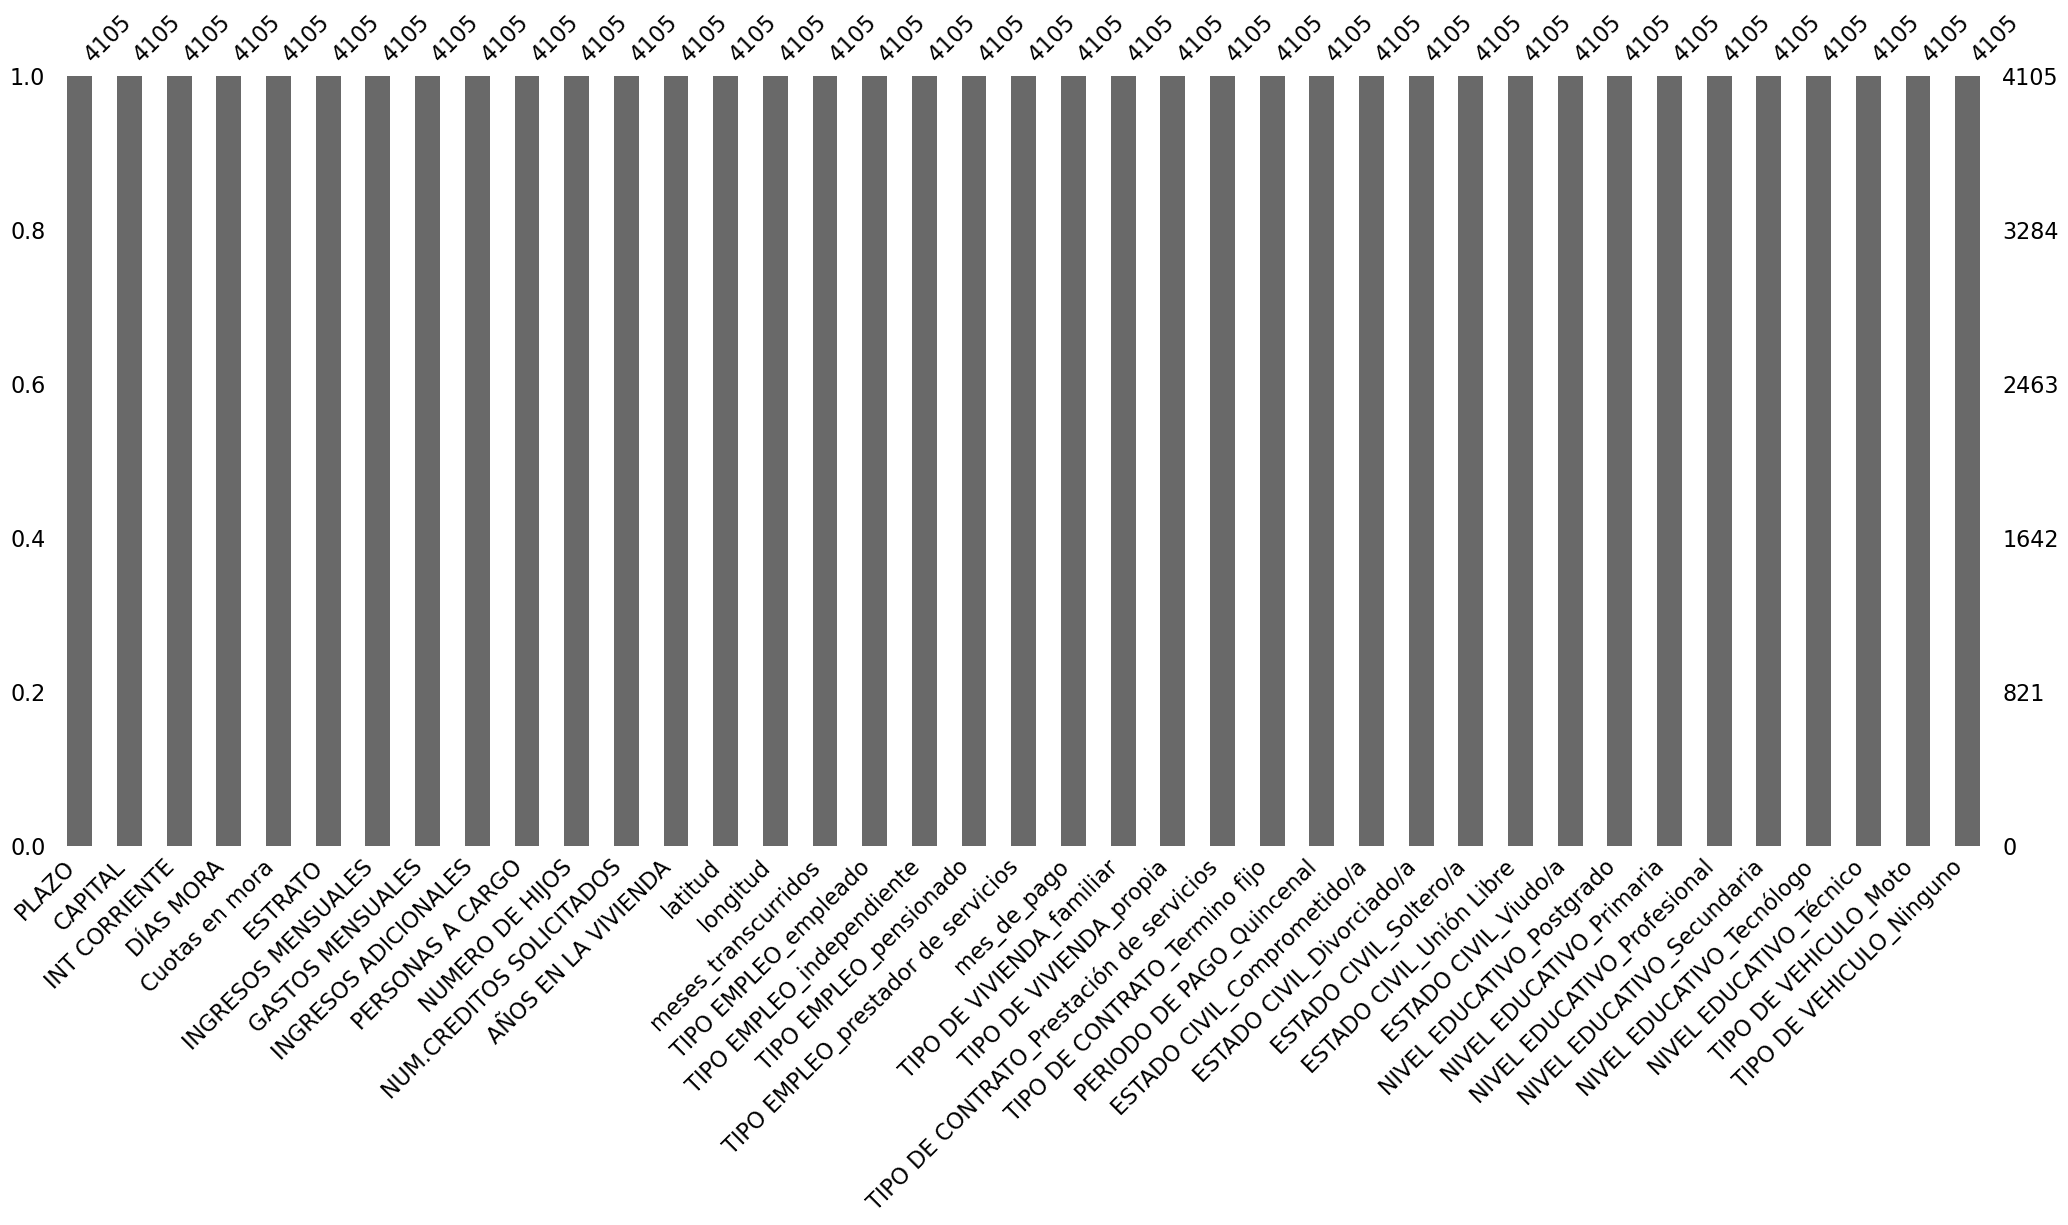

In [94]:
#confirma valores nulos en columnas imputadas
msno.bar(df_imputado_final)

In [95]:

file_path = 'data\stage\df_imputado_final.csv'
df_imputado_final.to_csv(file_path, index=False)


In [80]:
# Check if the columns exist
missing_columns_in_df1 = [col for col in columnas_a_imputar2 if col not in df_categorico.columns]
missing_columns_in_df2 = [col for col in columnas_a_imputar2 if col not in df_imputado_final.columns]

if not missing_columns_in_df1 and not missing_columns_in_df2:
    # Check if the dataframes have the same number of rows
    if df_categorico.shape[0] == df_imputado_final.shape[0]:
        df_imputado_final[columnas_a_imputar2] = df_categorico[columnas_a_imputar2]
    else:
        print("The number of rows in both DataFrames is not the same.")
else:
    if missing_columns_in_df1:
        print(f"The column(s) {missing_columns_in_df1} do not exist in df_categorico.")
    if missing_columns_in_df2:
        print(f"The column(s) {missing_columns_in_df2} do not exist in df_imputado_final.")

The column(s) ['TIPO DE VIVIENDA', 'TIPO DE CONTRATO', 'PERIODO DE PAGO', 'ESTADO CIVIL', 'NIVEL EDUCATIVO', 'TIPO DE VEHICULO'] do not exist in df_imputado_final.


In [74]:
df_imputado_final[columnas_a_imputar2].isnull().sum()

TIPO DE VIVIENDA    0
TIPO DE CONTRATO    0
PERIODO DE PAGO     0
ESTADO CIVIL        0
NIVEL EDUCATIVO     0
TIPO DE VEHICULO    0
dtype: int64

In [55]:
df_imputado_final.isnull().sum()

PLAZO                                         0
CAPITAL                                       0
INT CORRIENTE                                 0
DÍAS MORA                                     0
Cuotas en mora                                0
ESTRATO                                       0
INGRESOS MENSUALES                            0
GASTOS MENSUALES                              0
INGRESOS ADICIONALES                          0
PERSONAS A CARGO                              0
NUMERO DE HIJOS                               0
NUM.CREDITOS SOLICITADOS                      0
AÑOS EN LA VIVIENDA                           0
latitud                                       0
longitud                                      0
meses_transcurridos                           0
TIPO EMPLEO_empleado                          0
TIPO EMPLEO_independiente                     0
TIPO EMPLEO_pensionado                        0
TIPO EMPLEO_prestador de servicios            0
TIPO DE VIVIENDA_familiar               

<Axes: >

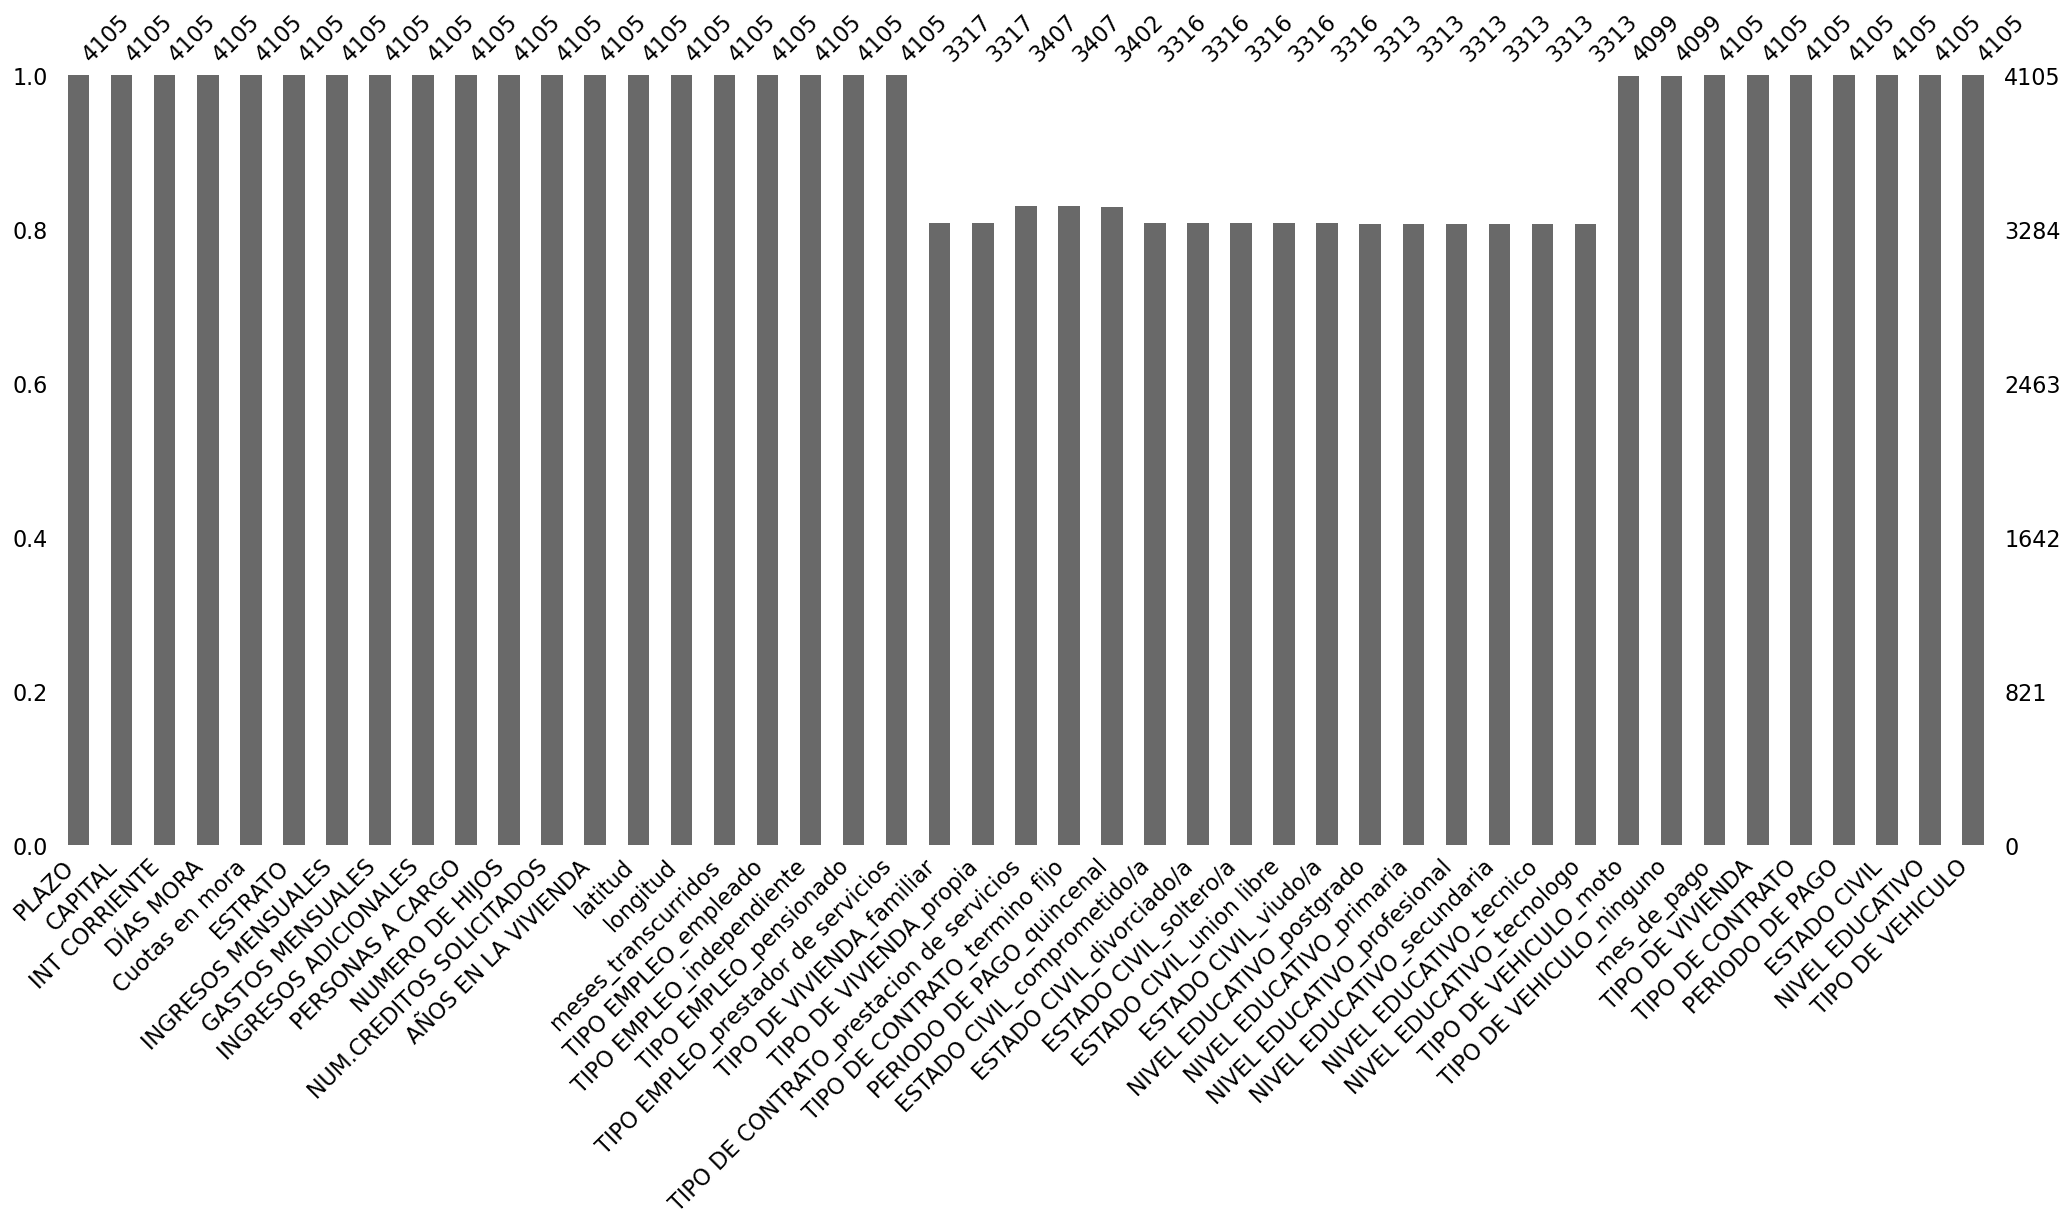

In [57]:
msno.bar(df_imputado_final)

In [62]:
df_imputado_final["TIPO DE VIVIENDA_familiar"].unique()

array([nan,  1.,  0.])

In [94]:
def get_scores_for_imputer(imputer, X_incompleto, y_incompleto):
    estimator = make_pipeline(imputer, regressor)
    impute_scores = cross_val_score(
        estimator, X_incompleto, y_incompleto, scoring="neg_mean_squared_error", cv=N_SPLITS
    )
    return impute_scores

### Imputacion por cero

In [95]:
def get_impute_zero_score(X_incompleto, y_incompleto):
    imputer = SimpleImputer(
        missing_values=np.nan, add_indicator=True, strategy="constant", fill_value=0
    )
    zero_impute_scores = get_scores_for_imputer(imputer, X_incompleto, y_incompleto)
    return zero_impute_scores.mean(), zero_impute_scores.std()


mses_df[1], stds_df[1] = get_impute_zero_score(
    X_incompleto, y_incompleto
)

x_labels.append("Imputacion con cero")

### Imputacion por MICE

#### Imputacion

In [138]:
X_num

,PLAZO,CAPITAL,INT CORRIENTE,DÍAS MORA,ESTRATO,INGRESOS MENSUALES,GASTOS MENSUALES,INGRESOS ADICIONALES,PERSONAS A CARGO,NUMERO DE HIJOS,NUM.CREDITOS SOLICITADOS,AÑOS EN LA VIVIENDA,latitud,longitud,meses_transcurridos,mes_de_pago
0,9,100000,563.100000,2869,2.0,NaN,NaN,NaN,0.0,0.0,1,3.0,1.21361,-77.28111,24.000000,6
1,14,150000,1313.900000,2864,3.0,NaN,NaN,NaN,0.0,0.0,1,3.0,3.90089,-76.29783,12.000000,7
2,30,350000,6569.500000,2856,3.0,NaN,NaN,NaN,0.0,0.0,1,3.0,7.53941,-72.77238,12.000000,7
3,29,250000,4536.083333,2851,3.0,NaN,NaN,NaN,1.0,1.0,1,2.0,4.60971,-74.08175,NaN,7
4,28,200000,3503.733333,2851,3.0,NaN,NaN,NaN,1.0,1.0,1,2.0,5.04333,-76.01667,0.000000,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4100,30,250000,4692.500000,449,3.0,1800000.0,600000.0,250000.0,NaN,NaN,1,3.0,6.25184,-75.56359,NaN,7
4101,30,350000,6569.500000,448,3.0,1920000.0,400000.0,300000.0,NaN,1.0,1,3.0,4.60971,-74.08175,112.976347,2
4102,30,300000,5631.000000,447,3.0,NaN,NaN,NaN,1.0,1.0,1,2.0,5.54782,-75.64368,206.767411,2
4103,30,450000,8446.500000,447,3.0,3800000.0,1000000.0,500000.0,1.0,1.0,1,2.0,4.60971,-74.08175,58.672799,2


In [139]:
imputer = IterativeImputer(
        missing_values=np.nan,
        add_indicator=True,
        random_state=0,
        n_nearest_features=3,
        max_iter=5,
        sample_posterior=True,
    )
    
    # Fit the imputer on the incomplete dataset and transform it to get the imputed dataset
imputer.fit(X_num)
X_imputed = imputer.transform(X_num)
datos2 = pd.DataFrame(X_imputed)
datos2

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,9.0,100000.0,563.100000,2869.0,2.0,4.343965e+06,3.624602e+06,8.691862e+05,0.000000,0.000000,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,14.0,150000.0,1313.900000,2864.0,3.0,2.948470e+06,-2.574762e+06,5.882458e+05,0.000000,0.000000,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,30.0,350000.0,6569.500000,2856.0,3.0,-2.509808e+06,1.402897e+06,1.433125e+05,0.000000,0.000000,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,29.0,250000.0,4536.083333,2851.0,3.0,6.058372e+06,-8.625848e+05,1.227559e+06,1.000000,1.000000,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,28.0,200000.0,3503.733333,2851.0,3.0,-1.121223e+06,-1.786286e+06,-4.294167e+05,1.000000,1.000000,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4100,30.0,250000.0,4692.500000,449.0,3.0,1.800000e+06,6.000000e+05,2.500000e+05,2.582438,2.027909,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4101,30.0,350000.0,6569.500000,448.0,3.0,1.920000e+06,4.000000e+05,3.000000e+05,1.263017,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4102,30.0,300000.0,5631.000000,447.0,3.0,7.511813e+06,-3.982130e+06,9.121306e+05,1.000000,1.000000,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4103,30.0,450000.0,8446.500000,447.0,3.0,3.800000e+06,1.000000e+06,5.000000e+05,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
X_num.shape

(4105, 16)

#### Evaluacion

In [103]:
def get_impute_iterative(X_incompleto, y_incompleto):
    imputer = IterativeImputer(
        missing_values=np.nan,
        add_indicator=True,
        random_state=0,
        n_nearest_features=3,
        max_iter=1,
        sample_posterior=True,
    )
    iterative_impute_scores = get_scores_for_imputer(imputer, X_incompleto, y_incompleto)
    return iterative_impute_scores.mean(), iterative_impute_scores.std()


mses_df[2], stds_df[2] = get_impute_iterative(
    X_incompleto, y_incompleto
)

x_labels.append("Imputacion iterativa")

mses_df = mses_df 


### Imputacion por KNN

#### Evaluacion

In [104]:
def get_impute_knn_score(X_incompleto, y_incompleto):
    imputer = KNNImputer(missing_values=np.nan, add_indicator=True)
    knn_impute_scores = get_scores_for_imputer(imputer, X_incompleto, y_incompleto)
    return knn_impute_scores.mean(), knn_impute_scores.std()


mses_df[3], stds_df[3] = get_impute_knn_score(
    X_incompleto, y_incompleto
)

x_labels.append("Imputacion KNN")
mses_df = mses_df*-1

### Comparacion de imputaciones

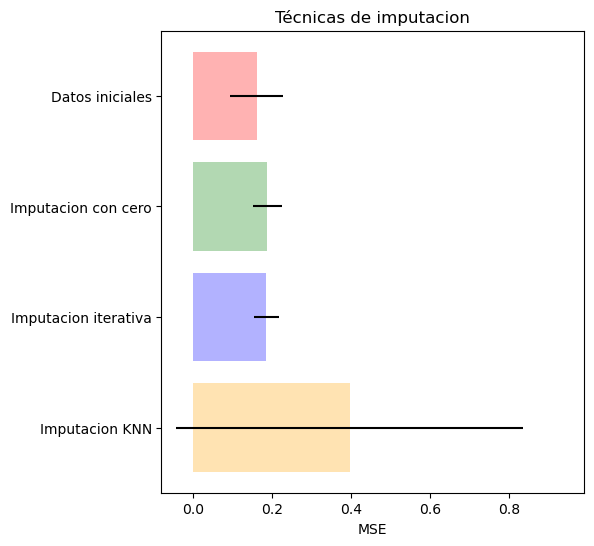

In [113]:
n_bars = len(mses_df)
xval = np.arange(n_bars)

colors = ["r", "g", "b", 'orange']

# Plot resultados
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(121)
for j in xval:
    ax1.barh(
        j,
        mses_df[j],
        xerr=stds_df[j],
        color=colors[j],
        alpha=0.3,
        align="center",
    )

ax1.set_title("Técnicas de imputacion")
ax1.set_xlim(left=np.min(mses_df) * -0.5, right=np.max(mses_df) * 2.5)
ax1.set_yticks(xval)
ax1.set_xlabel("MSE")
ax1.invert_yaxis()
ax1.set_yticklabels(x_labels)


plt.show()

In [107]:
if len(xval) != len(x_labels):
    print("The number of ticks does not match the number of labels.")
else:
    ax1.set_yticks(xval)
    ax1.set_yticklabels(x_labels)

The number of ticks does not match the number of labels.


In [105]:
mses_df, stds_df

(array([0.16063393, 0.18780591, 0.18572091, 0.3963967 ]),
 array([0.06722275, 0.03618579, 0.03209947, 0.44019947]))

In [108]:
xval


array([0, 1, 2, 3])

In [109]:
x_labels

['Datos iniciales',
 'Imputacion con cero',
 'Imputacion iterativa',
 'Imputacion KNN',
 'Imputacion KNN',
 'Imputacion iterativa',
 'Imputacion KNN']

In [110]:
x_labels = ['Datos iniciales',
 'Imputacion con cero',
 'Imputacion iterativa',
 'Imputacion KNN']